In [241]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import geopy
from geopy.geocoders import Nominatim
import seaborn as sns
%matplotlib inline

In [4]:
#Csv from Census.gov - American Factfinder 
#New York Household income by zip code
ny_income = pd.read_csv("NYC_zip_income.csv")
nyc_income_df = pd.DataFrame(ny_income)
#MTA turnstile data
mta = pd.read_csv("turnstile_180922.txt")
df_mta = pd.DataFrame(mta)
#MTA Stations File
mta_stat = pd.read_csv("mta_station_addr.csv")
mta_stat_df = pd.DataFrame(mta_stat)

In [ ]:
#Drop unneeded columns 
mta_stat_df.drop(['NOTES'],axis=1, inplace = True)
mta_stat_df.drop(['URL'],axis=1, inplace = True)
#mta_stat_df.rename(columns={'NAME': 'STATION'}, inplace=True)

In [86]:
#import team-updated MTA benson dataset
mta_benson = pd.read_csv("full_location_dataset_techadded")
mta_benson_df = pd.DataFrame(mta_benson)

In [251]:
#Sum all income categories above $100k by zipcode
#Retrieve proportions of the population
aflist = []
for i in range(364):
    a = ny_income.iloc[i,15]
    b = ny_income.iloc[i,16]
    c = ny_income.iloc[i,17]
    d = ny_income.iloc[i,18]
    e = ny_income.iloc[i,2]
    f = a+b+c+d
    g = f/e
    aflist.append(g)
#Normalize totals and append to ny_income DataFrame
norm_aflist = (aflist - min(aflist)) / (max(aflist) - min(aflist))
ny_income['affluence'] = aflist
ny_income['norm_affl'] = norm_aflist
ny_income.head()

,GEO.id,ZCTA5,total,">$10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999",...,"$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",affluence,norm_affl
0,8600000US10001,10001,11967,1076,478,639,287,270,256,446,...,301,600,779,1068,1071,592,1053,2711,0.453497,0.453497
1,8600000US10002,10002,33327,5111,4003,2368,2135,1465,1426,1355,...,1149,1723,2660,2519,1731,1358,1200,2094,0.191526,0.191526
2,8600000US10003,10003,27258,1762,557,821,951,759,719,509,...,723,1037,2094,2798,2464,1613,2912,6797,0.505760,0.505760
3,8600000US10004,10004,1592,29,5,5,21,0,35,78,...,13,95,51,221,236,106,167,481,0.621859,0.621859
4,8600000US10005,10005,4295,358,61,83,77,13,15,48,...,25,183,227,391,538,379,522,1355,0.650524,0.650524


In [255]:
#Create affluence dataFrame derived from ny_income
affluence = ny_income[['ZCTA5','affluence','norm_affl']]
df_affluence = pd.DataFrame(affluence)
df_affluence.rename(index = str,columns={'ZCTA5':'Zipcodes'}, inplace=True)
df_affluence.rename(columns={'affluence': 'Benson Income Score'}, inplace=True)
#Convert zipcodes from float to string
df_affluence['Zipcodes'] = df_affluence['Zipcodes'].astype('str') 
df_affluence.drop('norm_affl', axis =1, inplace = True)
df_affluence.head()

,Zipcodes,Benson Income Score
0,10001,0.453497
1,10002,0.191526
2,10003,0.505760
3,10004,0.621859
4,10005,0.650524


In [ ]:
####This cell takes a long time to run!
####Re-run cell if timeout
#Create Zipcodes column in mta_benson DataFrame
mta_benson['Zipcodes'] = 0
geolocator = Nominatim(user_agent="mta")
ziplist=[]
for i in range(497):
#Show progress if value already imputed
    if mta_benson.iloc[i, 19] != 0:
        print(f"skipping {i}")  
        continue
#Extract  raw addresses from geographic coordinates
    lat = mta_benson.iloc[i, 11]
    lon = mta_benson.iloc[i, 12]
    lat_lon = str(lat) + "," + str(lon)
    zipc = geolocator.geocode(lat_lon, addressdetails=True)
#Pull Zipcode values from raw address
#Try / except continue program if zipcode undetermined
    try:
        zipco = zipc.raw['address']['postcode']
    except: 
        continue
#Append zipcodes to mta-benson
#Print to progress reference
    mta_benson.iloc[i,19] = zipco
    print(zipco)

In [122]:
#Data Cleaning
#Impute missing values and inconsistent values 
#i.e. NY10036 insted of 10036
mta_benson.iloc[[14],[19]] = '10012'
mta_benson.iloc[[49],[19]] = '10018'
mta_benson.iloc[[60],[19]] = '10036'
mta_benson.iloc[[72],[19]] = '10019'
mta_benson.iloc[[78],[19]] = '10019'
mta_benson.iloc[[80],[19]] = '11201'
mta_benson.iloc[[115],[19]] = '10023'
mta_benson.iloc[[208],[19]] = '11101'
mta_benson.iloc[[226],[19]] = '10451'
mta_benson.iloc[[231],[19]] = '11101'
mta_benson.iloc[[257],[19]] = '10457'
mta_benson.iloc[[261],[19]] = '10457'
mta_benson.iloc[[414],[19]] = '11374'
mta_benson.iloc[[426],[19]] = '11374'

In [129]:
#Merge mta_benson and df_affluence DataFrames by Zipcodes
#Zipcodes and "Benson Income Score" to main DataFrame
merged = pd.merge(mta_benson, df_affluence, on='Zipcodes', how='outer')
merged_mta_benson = pd.DataFrame(merged)
#Drop all rows with Zipcodes that do not contain stations
merged_mta_benson.drop(merged_mta_benson.index[497:], inplace = True)
merged_mta_benson.rename(columns={'Benson Income Score_y': 'Benson Income Score'}, inplace=True)
merged_mta_benson.drop('Benson Income Score_x', axis =1, inplace = True)

In [254]:
#Data cleaning
#Stations in zipcodes with zero residents
#Imputed values based on zipcodes that envelope that location
merged_mta_benson.iloc[[59],[19]] = 0.453497117
merged_mta_benson.iloc[[60],[19]] = 0.794750273
merged_mta_benson.iloc[[86],[19]] = 0.453497117
merged_mta_benson.iloc[[111],[19]] = 0.588966457
merged_mta_benson.iloc[[185],[19]] = 0.297573542
merged_mta_benson.head()

,Unnamed: 0,Unnamed: 0.1,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,WalkScore,Benson WalkScore,Income,Benson Tech Score,key,Zipcodes,Benson Income Score
0,15.0,15.0,16.0,16.0,R21,BMT,Broadway - Brighton,8 St - NYU,M,R W,Subway,40.730328,-73.992629,100.0,1.0,0.0,1.000000,0.0,10003,0.50576
1,408.0,408.0,407.0,407.0,636,IRT,Lexington Av,Astor Pl,M,6,Subway,40.730054,-73.991070,100.0,1.0,0.0,0.998086,0.0,10003,0.50576
2,116.0,116.0,117.0,602.0,L03,BMT,Canarsie,Union Sq - 14 St,M,L,Subway,40.734789,-73.990730,100.0,1.0,0.0,0.993882,0.0,10003,0.50576
3,407.0,407.0,406.0,602.0,635,IRT,Lexington Av,14 St - Union Sq,M,4 5 6,Subway,40.734673,-73.989951,100.0,1.0,0.0,0.992578,0.0,10003,0.50576
4,14.0,14.0,15.0,602.0,R20,BMT,Broadway - Brighton,14 St - Union Sq,M,N Q R W,Subway,40.735736,-73.990568,100.0,1.0,0.0,0.990958,0.0,10003,0.50576


In [185]:
#Final file for team analysis
merged_mta_benson.to_csv("location_all_bensons.csv")

In [256]:
#Create dataset to create visualization
aff_graph = merged_mta_benson[['Stop Name','Benson Income Score']]
aff_graph = pd.DataFrame(aff_graph)
aff_graph = aff_graph.sort_values('Benson Income Score',ascending = False)
aff_graph = aff_graph.head(24)
aff_graph.head()

,Stop Name,Benson Income Score
66,Chambers St,0.79475
67,Chambers St,0.79475
68,Park Pl,0.79475
69,World Trade Center,0.79475
70,WTC Cortlandt,0.79475


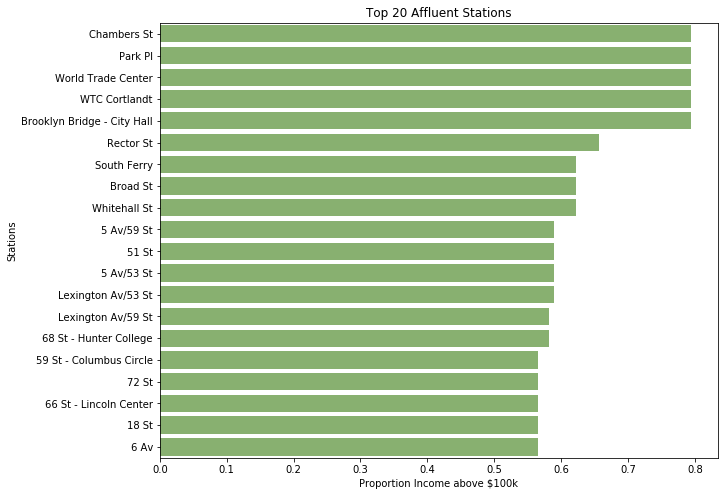

In [248]:
#Top affluence by station
f, ax = plt.subplots(figsize=(10, 8))
sns_plot = sns.barplot(x = 'Benson Income Score', y='Stop Name',data=aff_graph, color='#85bb65')
plt.xlabel("Proportion Income above $100k")
plt.ylabel("Stations")
plt.title("Top 20 Affluent Stations");